In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
ROOT_DIR = "/home/sangam/workspace/sangam/ml-convection/data/ML_NC"

In [5]:
dataset_path_arr = []
centres_filepath = os.path.join(ROOT_DIR, "centres.csv")

for filename in os.listdir(ROOT_DIR):
    if not filename.endswith(".csv"):
        raise Exception("All files should be Csv")
    if filename == "centres.csv":
        continue
    filepath = os.path.join(ROOT_DIR, filename)
    dataset_path_arr.append(filepath)

In [11]:
filepath_sample = dataset_path_arr[23]
int_value = float(filepath_sample.split("traindata")[1].split(".csv")[0])
print(int_value)

99.28


In [12]:
sorted_dataset_path_arr = sorted(dataset_path_arr, 
                                 key = lambda filename: float(filename.split("traindata")[1].split(".csv")[0]))

In [17]:
df_centres = pd.read_csv(centres_filepath)
df_centres_un = ((df_centres*10000)/25).astype("int32")
df_centres_un.head()

,Unnamed: 0,x,y,z
0,0,1,1,20
1,400,3,1,20
2,800,5,1,20
3,1200,7,1,20
4,1600,9,1,20


In [21]:
asc_arr = np.arange(1,201)
grid_xnp = np.tile(asc_arr, 200)
grid_xnp = np.expand_dims(grid_xnp, axis = 1)
grid_ynp = np.repeat(asc_arr, 200)
grid_ynp = np.expand_dims(grid_ynp, axis = 1)
grid_number = grid_ynp.shape[0]

In [22]:
test_df = pd.read_csv(sorted_dataset_path_arr[0])
test_df.head()

,Unnamed: 0,T,p,p_rgh,Ux,Uy,Ux.1
0,0,293.251,100006.0,6.08676,0.000190,0.000008,0.0
1,1,293.002,100006.0,6.08655,0.000389,-0.000024,0.0
2,2,293.000,100006.0,6.08631,0.000400,-0.000022,0.0
3,3,293.000,100006.0,6.08606,0.000405,-0.000020,0.0
4,4,293.000,100006.0,6.08582,0.000407,-0.000019,0.0


In [23]:
# This is one of the slowest functions, need to change this
def get_visual(dataset_path):
    """For the given dataset path and unnormalized centeres df. 
    It will give the plot of any required param. 

    Args:
        dataset_path (_type_): Path of traindata*.csv
        df_centres_un (_type_): centres.csv, read and unnormalized. (Reading it many times will be a bottleneck)
        param (str, optional): Available: [p, p_rgh, Ux, Uy]. Defaults to "p".

    Returns:
        np.ndarray(400,400): The visualization
    """

    # grid_number_x = grid_number_y = 200 

    df_openfoam = pd.read_csv(dataset_path)
    openfoam_np = df_openfoam.to_numpy().astype("float32")
    
    t_np = openfoam_np[:,1:2]
    p_np = openfoam_np[:,2:3]
    ph_np = openfoam_np[:,3:4]
    U_np = openfoam_np[:,4:6]

    t_matrix = np.ones([200,200])
    p_matrix = np.ones([200,200])
    ph_matrix = np.ones([200,200])
    ux_matrix = np.ones([200,200])
    uy_matrix = np.ones([200,200])
    for i in range(0, grid_number):
        ngrid_x = grid_xnp[i]
        ngrid_y = grid_ynp[i]
        t_matrix[ngrid_x-1,ngrid_y-1] = t_np[i,0]
        p_matrix[ngrid_x-1,ngrid_y-1] = p_np[i,0]
        ph_matrix[ngrid_x-1,ngrid_y-1] = ph_np[i,0]
        ux_matrix[ngrid_x-1,ngrid_y-1] = U_np[i,0]
        uy_matrix[ngrid_x-1,ngrid_y-1] = U_np[i,1]
    return (t_matrix, p_matrix, ph_matrix, ux_matrix, uy_matrix)

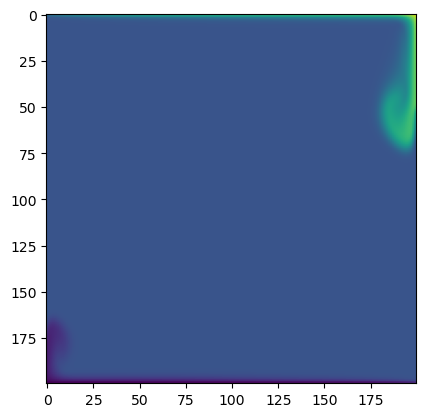

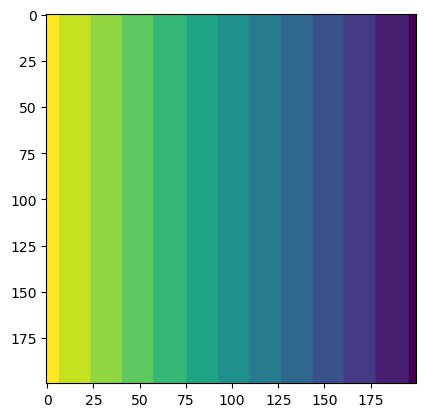

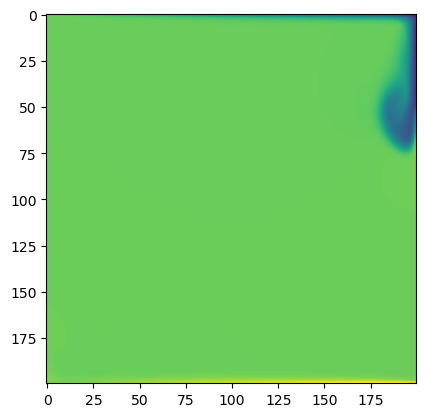

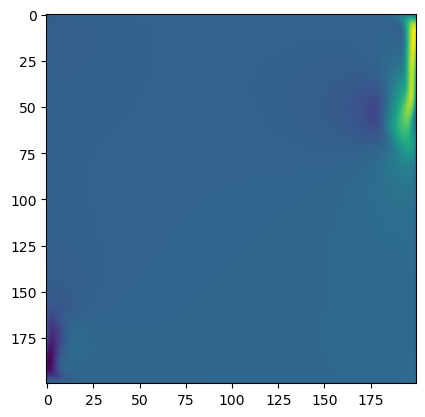

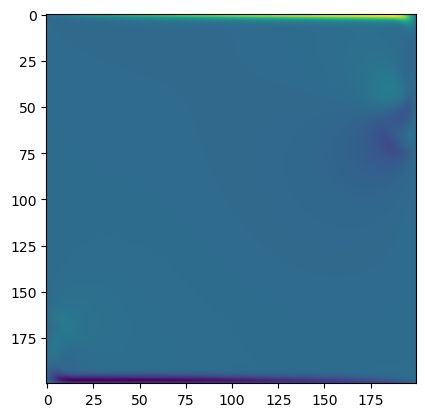

In [27]:
dataset_path_test = sorted_dataset_path_arr[500]
matrices_arr = get_visual(dataset_path_test)

for matrix in matrices_arr: 
    plt.imshow(matrix)
    plt.show()

In [28]:
t_arr = []
p_arr = []
ph_arr = []
ux_arr = []
uy_arr = []
for dataset_path in sorted_dataset_path_arr:
    matrices_arr = get_visual(dataset_path)
    t_arr.append(matrices_arr[0])
    p_arr.append(matrices_arr[1])
    ph_arr.append(matrices_arr[2])
    ux_arr.append(matrices_arr[3])
    uy_arr.append(matrices_arr[4])

In [29]:
np.save("dataset/t_arr.npy", t_arr)
np.save("dataset/p_arr.npy", p_arr)
np.save("dataset/ph_arr.npy", ph_arr)
np.save("dataset/ux_arr.npy", ux_arr)
np.save("dataset/uy_arr.npy", uy_arr)

MovieWriter ffmpeg unavailable; using Pillow instead.


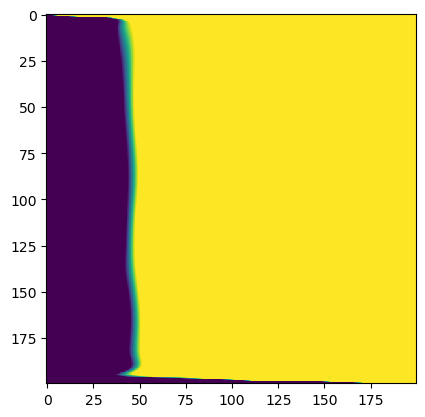

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
im = plt.imshow(t_arr[0])

def updatefig(j):
    im.set_array(t_arr[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames = range(10000), interval = 50, blit = True)

ani.save("animations/movie_t.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


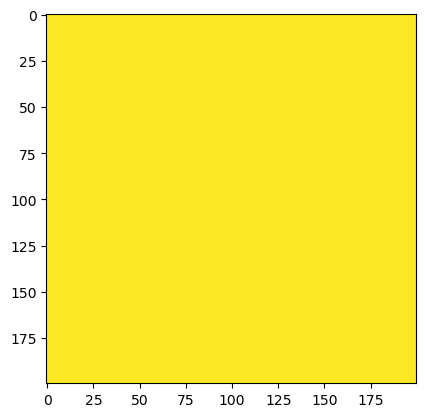

In [31]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
im = plt.imshow(p_arr[0])

def updatefig(j):
    im.set_array(p_arr[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames = range(10000), interval = 50, blit = True)

ani.save("animations/movie_p.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


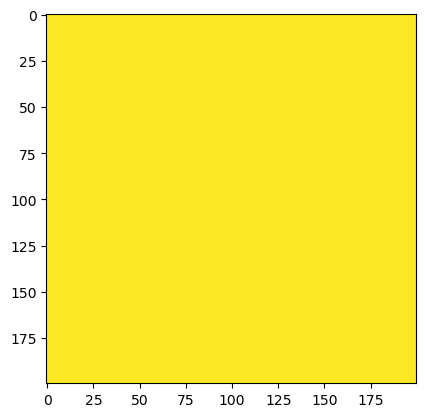

In [32]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
im = plt.imshow(ph_arr[0])

def updatefig(j):
    im.set_array(ph_arr[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames = range(10000), interval = 50, blit = True)

ani.save("animations/movie_ph.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


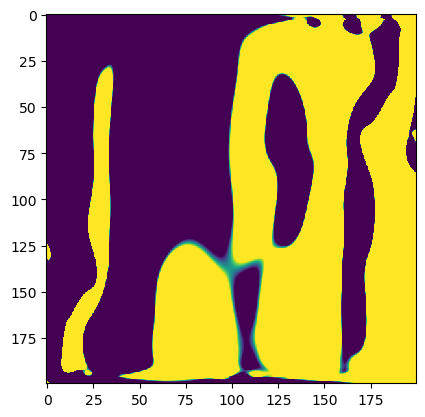

In [33]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
im = plt.imshow(ux_arr[0])

def updatefig(j):
    im.set_array(ux_arr[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames = range(10000), interval = 50, blit = True)

ani.save("animations/movie_ux.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


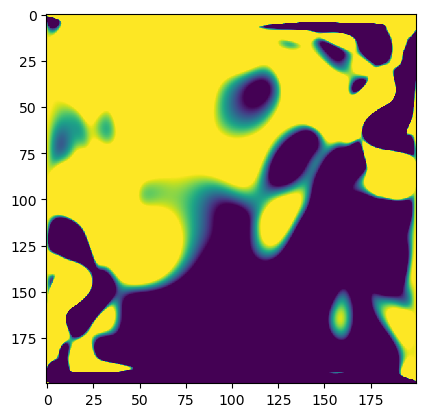

In [34]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure()
im = plt.imshow(uy_arr[0])

def updatefig(j):
    im.set_array(uy_arr[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames = range(10000), interval = 50, blit = True)

ani.save("animations/movie_uy.gif")